<a href="https://colab.research.google.com/github/vlgul/series-de-tiempo/blob/main/Capitulo_9_Tema_9_1_Series_temporales_estacionarias_y_no_estacionarias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Capitulo 9:  Box-Jenkins** ###

### 9.1. Series temporales estacionarias y no estacionarias ###

La Olympia Paper Company Inc, fabrica toallas de papel absorbente. A la compañia le gustaria desarrollar un modelo de prediccion que se pueda usar para obtener pronosticos puntuales y pronosticos de intervalos de predicción de las ventas semanales de más de 100,000 rollos en unidades de 10,000 rollos de toallas de papel absorbente. Si cuenta con un modelo confiable, Olympia Paper puede planificar mucho mejor su programa de producción, planificar su presupuesto, y estimar las necesidades de fabricar y almacenar su producto. Durante las 120 semanas anteriores, la compañia registró las ventas semanales de las toallas de papel. Los 120 valores de las ventas, y1,y2,...,y120 se encuentran en el archivo **toallas.csv** y se requiere graficar como la figura 9.1(a). Observe en la figura que los valores originales de la serie temporal no parecen fluctuar con respecto de una media constante y, por tanto, pareciera que estos valores no son estacionarios.

In [ ]:
n<-120
Zt<-double(n)
Zt2<-double(n)

Extraer datos del archivo toallas.csv con los 120 datos de las ventas

In [ ]:
toallas<- read.csv("/content/toallas.csv", header=TRUE)
t<-toallas$t
Yt<-toallas$Yt

Calcular las primeras diferencias Zt de los valores originales Yt

In [ ]:
for (i in 2:n){
  Zt[i]<-Yt[i]-Yt[i-1]
}

Calcular las segundas diferencias Zt de los valores de la serie temporal

In [ ]:
for (i in 3:n){
  Zt2[i]<-Yt[i]-(2*Yt[i-1])+Yt[i-2]
}

Graficar los valores originales, primeras y segundas diferencias

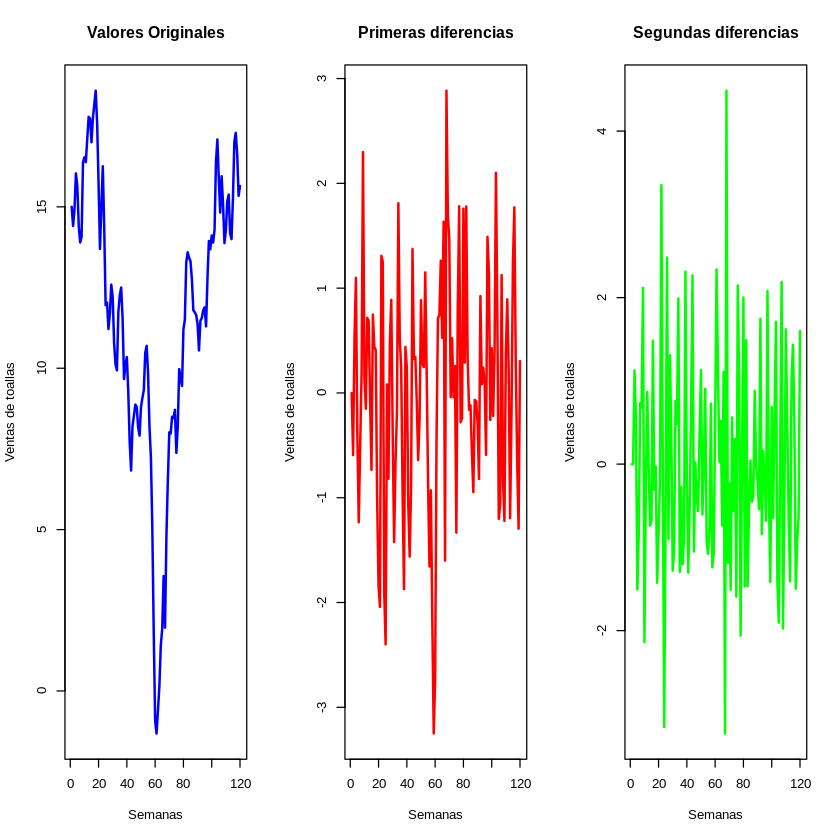

In [ ]:
par(mfrow=c(1,3))  
plot(t,Yt,main="Valores Originales",
     xlab="Semanas",ylab="Ventas de toallas",
     type="l",pch = 2,lwd=2,
     col="blue")

plot(t,Zt,main="Primeras diferencias",
     xlab="Semanas",ylab="Ventas de toallas",
   type="l",pch = 2,lwd=2,
   col="red")

plot(t,Zt2,main="Segundas diferencias",
     xlab="Semanas",ylab="Ventas de toallas",
     type="l",pch = 2,lwd=2,
     col="green")

Presentar en tabla los valores originales, primeras y segundas diferencias

In [ ]:
ToallaS<-data.frame(t, Yt, Zt, Zt2)
ToallaS

t,Yt,Zt,Zt2
<int>,<dbl>,<dbl>,<dbl>
1,15.0000,0.0000,0.0000
2,14.4064,-0.5936,0.0000
3,14.9383,0.5319,1.1255
4,16.0374,1.0991,0.5672
5,15.6320,-0.4054,-1.5045
6,14.3975,-1.2345,-0.8291
7,13.8959,-0.5016,0.7329
8,14.0765,0.1806,0.6822
9,16.3750,2.2985,2.1179
